#Project Module 6: Regression
#CPSMA 4413-01 Dr. Jacob's Numerical Methods
Reed Barker and Seth Jensen

#Linear Regression

The first dataset we decided to use for linear regression was "topRecords," and we compared the release date of the record vs. sales. We predicted that our linear regression would be easy to see as we thought it would be a decreasing line because of new technology replacing records.

---

This first coding cell contains multiple functions that we found useful that is within the chapter that we can and did call later in this file. They all have an array parameter and return a single number.

In [87]:
def averageFun(inArr):
  sum = 0
  for i in range(len(inArr)):
    sum += inArr[i]
  return sum / len(inArr)

def sumOfSquares_Array(inArr):
  sum = 0
  yAve = averageFun(inArr)
  for i in range(len(inArr)):
    sum += ((inArr[i] - yAve)**2)
  return sum

def varianceFun(inArr):
  return sumOfSquares_Array(inArr) / (len(inArr) - 1)

def standardDevFun(inArr):
  return (sumOfSquares_Array(inArr) / (len(inArr) - 1)) ** .5

In this next coding cell, we pulled the data directly out of the database for simplicity and to show the concept without much complication.  
"linearArrayX" holds the "Released" (year released) column, which is our independent variable.  
"linearArrayY" holds our chosen dependent variable, "Claimed sales in millions." 

---

Proceeding the array declarations lies our functions.  
Summation receives an array as a parameter and returns the sum of all the values in the array.  
Step1 receives two arrays and returns a<sub>1</sub> by declaring five empty arrays, appending alternations to the parameter arrays according to the following equation, and finally summing the alternated portions according to the mentioned equation:  

$a_1 = \frac{n\sum\limits_{i=1}^n x_i y_i - \sum\limits_{i=1}^n x_i \sum\limits_{i=1}^n y_i}{n\sum\limits_{i=1}^n x_i^2 - (\sum\limits_{i=1}^n x_i)^2}$

Step2 finds a<sub>0</sub> by similar methods but having an extra parameter of a<sub>1</sub>. Within our return, we call to sum our arrays, which returns the value of a<sub>0</sub>.

In [88]:
linearArrayX = [1982,1980,1992,1973,1976,1976,1997,1977,1977,1971,1987,1977,1995,1987,1996,2011,2000,1991,1997,1984,1987,1984,1992,1985,1999,1990,1979,1967,1991,1969,2002,1993,1978,2002,1997,1999,1991,1992,1981,1985,2000,2000,1987,1985,1984,1986,1971,1986,1970,1987,1974,1999,1996,1993,2015,1995,1999,1984,1994,1957,1976,1995,1994,1995,2000,1987,1987,1998,1988,1983,1979,1996,1995,1993,1973,1975,1983]
linearArrayY = [70,50,45,45,44,42,40,40,40,37,35,34,33,32,32,31,31,31,31,30,30,30,30,30,30,30,30,30,30,30,28,28,28,27,27,26,26,26,25,25,25,25,25,25,25,25,25,25,25,25,24,24,23,23,22,22,22,21,21,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20]


def summation(arr):
  sum = 0
  for i in range(len(arr)):
    sum += arr[i]
  return sum #returns the sum of everything within arr

def step1(xArr, yArr):
  sum1 = []
  sum2 = []
  sum3 = []
  sum4 = []
  sum5 = []

  for i in range(len(xArr)):
    sum1.append(xArr[i] * yArr[i])
    sum2.append(xArr[i])
    sum3.append(yArr[i])
    sum4.append(xArr[i]**2)
    sum5.append(xArr[i])

  return ( ( len(xArr)*(summation(sum1)) ) - ( summation(sum2)*summation(sum3) ) ) / ( (len(xArr)*summation(sum4)) - (summation(sum5) ** 2)) #returns a1a
  
def step2(xArr, yArr, a1): 
  return summation(yArr) / len(yArr) - a1 * (summation(xArr) / len(xArr)) #returns a0

a1 = step1(linearArrayX, linearArrayY)
a0 = step2(linearArrayX, linearArrayY, a1)

print("a1:", a1)
print("a0:", a0)


a1: -0.15101142237253526
a0: 328.09085936716593


The following code cell uses the sum of squares to find the standard deviation for the margin of error value via this function:

$
s = \sqrt{\frac{\sum\limits_{i=1}^n (y_i - \bar{y})^2}{n-1}}
$

In [89]:
sOFsArray = []

for i in range(len(linearArrayY)):
  sOFsArray.append(linearArrayY[i] - a0 - a1*linearArrayX[i])
  
sOFsYvsX = ( sumOfSquares_Array(sOFsArray) / (len(linearArrayY) - 2) ) ** .5
print("Margin of error:", sOFsYvsX)

Margin of error: 8.469354194202868


We plot our graph and data in this last code cell within linear regression. Our solid red line is the regression line, and our dashed lines are our margin of error moved vertically, plus or minus that value.

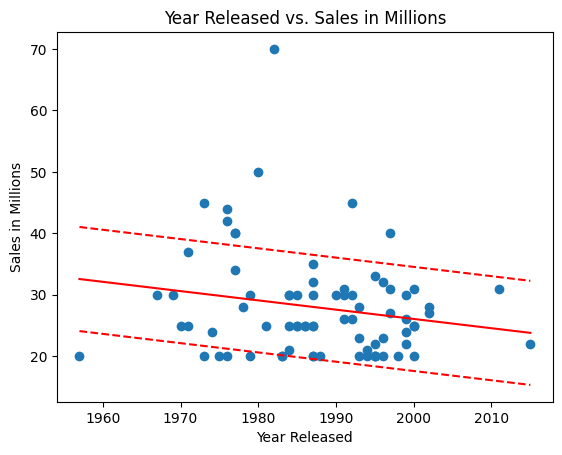

In [90]:
import matplotlib.pyplot as plt

regression_x = [min(linearArrayX), max(linearArrayX)]
regression_y = [a0 + a1*x for x in regression_x]

errorPlus_x = [min(linearArrayX), max(linearArrayX)]
errorPlus_y = [a0 + a1*x + sOFsYvsX for x in errorPlus_x]

errorMin_x = [min(linearArrayX), max(linearArrayX)]
errorMin_y = [a0 + a1*x - sOFsYvsX for x in errorMin_x]

plt.scatter(linearArrayX, linearArrayY)
plt.plot(regression_x, regression_y, color="red")

plt.plot(errorPlus_x, errorPlus_y, color="red", ls='--')
plt.plot(errorMin_x, errorMin_y, color="red", ls='--')

plt.title('Year Released vs. Sales in Millions')
plt.xlabel('Year Released')
plt.ylabel('Sales in Millions')

plt.show()


#NonLinear Regression


For our following dataset, we decided to use the "simpsons" database and compare columns "number_in_series" as our x value vs. "imdb_rating" as our y value.

We predicted the show's ratings would decrease as the series continued, so we used the power model. We got the power model to work by changing our Step1 and Step2 functions to use natural logs; otherwise, it is the same as the linear portion of this file.

In [91]:
linearArrayX = [10,12,14,17,19,21,23,26,28,30,32,35,37,39,41,44,46,48,51,53,55,58,60,65,69,72,7,24,80,82,84,87,89,92,93,95,98,102,104,107,111,114,116,118,120,123,125,127,130,132,134,139,140,143,67,149,151,153,157,160,163,164,167,168,171,173,175,178,180,184,186,189,191,196,198,200,203,205,207,212,214,219,222,224,226,229,231,233,238,240,242,245,247,249,251,254,258,261,263,265,268,270,272,274,279,281,284,286,70,294,297,299,301,306,308,311,313,315,318,320,322,326,328,331,333,335,338,340,342,345,347,349,352,354,357,75,363,365,368,370,372,376,379,381,383,385,387,390,392,394,397,399,402,406,408,410,413,415,417,419,422,424,77,433,438,440,442,448,450,452,455,457,462,464,466,469,472,473,476,478,480,482,485,487,489,491,494,496,498,447,91,504,506,508,513,516,518,520,522,525,527,531,534,536,538,541,543,545,547,550,552,554,557,559,562,564,570,9,11,13,15,16,18,20,22,25,27,29,33,573,576,580,583,585,588,590,593,595,1,2,4,6,8,34,36,38,40,78,73,86,71,74,90,54,42,43,66,47,76,49,57,85,50,52,79,63,81,56,61,64,68,94,97,99,137,113,147,117,131,142,119,135,103,105,121,122,106,133,124,108,110,129,126,145,112,115,138,141,144,136,150,152,181,166,154,169,156,158,202,199,187,174,159,170,193,183,172,161,197,177,179,188,201,192,204,190,195,146,208,210,211,252,215,220,232,221,260,213,230,246,228,223,243,227,225,216,234,236,237,259,239,248,255,241,244,148,264,267,269,287,288,316,271,285,295,280,305,273,293,275,296,283,300,276,278,289,310,298,302,309,312,314,165,319,321,323,337,334,353,362,325,327,343,358,329,359,360,366,339,330,350,364,332,367,346,355,336,341,344,194,375,377,396,405,393,416,378,388,423,382,411,428,384,386,407,420,400,425,391,389,395,398,414,412,427,421,418,206,430,432,465,439,463,437,451,443,436,459,444,461,479,477,454,470,449,453,481,446,484,456,471,483,474,467,475,217,488,490,497,540,507,512,517,533,537,505,492,499,539,501,523,503,532,526,519,509,514,510,515,521,528,535,530,218,544,549,560,565,579,584,551,575,572,569,581,563,587,571,568,553,555,586,561,556,566,591,574,589,582,577,31,45,5,59,62,83,88,96,100,101,109,128,155,162,176,182,185,209,256,257,266,291,292,495,558,578,594,3,235,250,253,282,307,324,348,351,369,371,374,403,426,441,445,458,460,468,493,524,529,546,567,592,596,597,262,277,290,303,304,317,356,361,373,380,401,404,409,429,431,434,435,486,500,502,511,542,548]
linearArrayY = [7.4,8.3,8.2,8.1,8,8.4,7.8,8,8.2,7.6,8.5,8,7.7,8.7,7.7,7.9,8.2,8.5,8.3,8.2,7.9,7.8,8.4,8.2,8.5,8,7.9,8.8,7.7,8.4,8.6,8,8.7,8.2,8.1,8.2,7.9,7.5,8.6,8.5,8.4,7.8,8.5,8.5,7.9,8.1,8.3,8.6,8.3,8.7,8.5,8.3,8.3,7.7,8.2,8.8,8,8.3,7.7,7.8,9,7.8,7.9,8.9,8.7,7.7,8,7.8,7.4,7.7,8,5.1,8.2,7.8,7.9,8.5,8.1,8.2,8,8.2,7.7,7.5,7.6,7.2,7.9,7.5,7.6,7.1,7.3,7.9,7.3,6.6,7.3,7.6,7.1,7.7,7.3,7.2,7.4,6.9,7.3,7.5,7.2,7.7,7.5,6.5,7,5.6,8.7,7,7.3,7.3,6.8,7.3,7.2,6.9,7.7,7.3,7.2,7.2,7.3,7.1,6.9,7,7.3,7.2,7.1,7.1,7,7.1,7,6.9,7.2,7.3,6.3,8.3,6.7,6.9,6.4,7,6.6,6.7,7.5,6.8,6.9,7,6.4,7,7.1,7.2,7.1,8.1,6.7,6.7,7.1,6.9,7.7,6.7,6.9,7.1,6.9,7.1,7.2,7.2,7,6.3,7.1,6.8,6.8,7.1,7.1,5.7,6.9,6.6,6.8,7.2,6.9,7,7,7.2,6.1,7,7.3,7.2,6.6,7.2,6.2,6.1,5.7,6.7,8.5,7.1,6.9,4.5,6.3,7.2,7,6.5,6.2,6.5,6.8,7,6.7,6.5,6.5,7.2,6.7,7,6.5,7.7,6.7,6.9,6.3,6.9,6.8,5.8,6.7,7.5,7.8,7.9,8.3,8.2,7.5,7.7,8.1,8.2,7.5,7.5,7.9,6.8,6.7,6.8,8.4,6.8,6.6,7.3,7.1,6.4,8.2,7.8,7.8,7.6,7.7,8.4,8.6,8.2,8.5,8.1,8.1,8.7,9,8.3,8.4,7.7,8.2,7.9,7.8,8.2,9,8,7.7,8.9,8,8.6,8.1,7.8,8.2,8.2,8.1,8.4,8.8,8.3,8.5,8.4,8,8,8.2,8.6,8.3,7.7,8.5,9,8,8.1,8.5,8.3,6,8.5,8.1,8.3,8,8.9,8.2,8.9,9,8.9,7.5,8.7,8.1,8.5,8.3,8,8.1,7.7,8.3,8.2,8,8.2,7.7,7.9,7.5,7.9,8,8.1,7.5,8.2,8.2,8.8,8.3,7.3,9.1,7.6,8.3,8.1,7.6,7.7,8,8,7.3,8,7.3,7.2,6.9,7.6,7.3,7.3,6.9,7.8,7.7,7.2,7.5,7.3,7,7.3,7.3,7.7,7.1,7.3,6.9,7.5,6.6,7.9,7.3,7.3,7.4,8.6,6.5,7.3,7,7.7,6.9,7,7.1,7.7,7.1,7.1,6.9,7.2,7.3,7.1,6.8,7.3,6.9,6.9,7.3,7.2,6.8,7.1,6.6,7,6.6,7.4,8.6,6.6,6.7,7.3,7,6.2,6.8,6.9,7.3,6.9,6.4,6.9,6.9,7,7.3,6.7,6.6,6.7,7.3,7,7.3,7,6.9,7.1,7.4,7.3,6.8,7.6,7.2,7.1,6.3,7.1,6.3,6.1,6.6,6.6,7,7.1,6.3,6.6,6.8,7.2,7.1,6.4,7.3,6.6,7.3,7,7.3,7,7.3,6.6,7.1,7.2,7,7.5,7,7,6.3,7.1,7.2,7.2,6.7,6.6,7.2,6.9,6.3,7.2,6.7,6.9,6.6,6.5,7.2,6.8,6.5,6.7,7.2,7,6.4,6.6,6.3,6.8,6.9,7.3,7,6.7,7,7.1,6.7,6.7,6.9,6.5,7,7.4,7.8,6.5,7.6,6.9,7,7.1,7.1,6.5,6.6,6.4,6.5,7.3,7.2,7,6.3,7.1,7,7.3,6.6,5.8,6.5,6.3,6.8,6.6,6.7,5.9,6.2,6.7,6.3,7.3,6.3,6.9,6.9,5.8,6.5,6.7,6.8,7.3,6.7,6.5,6.9,6.3,7.1,7.2,8,8.8,8.1,8.2,9,9,7.7,8.8,8.4,8.2,9,9.1,9.2,8.5,9.2,8.1,7.7,7.6,8,8,8.6,8,7.6,8.2,7.9,7.5,6.7,7.5,7.3,7.4,7.2,6.5,7.1,7.1,7,7.4,7.4,6.5,6.7,7.2,7.1,7.2,7.3,6.7,6.9,7.1,6.8,7.1,7.2,6.9,6.6,6.4,6.9,6.6,7.2,7,7.1,7.3,7.1,7.1,7.2,6.9,7.2,6.7,6.7,6.9,8.2,5.9,7,6.3,6.8,7,7,7.3,6.9,6.4,7]


import numpy as np


def step1(xArr, yArr):
    sum1 = []
    sum2 = []
    sum3 = []
    sum4 = []
    sum5 = []

    for i in range(len(xArr)):
        sum1.append(np.log(xArr[i]) * np.log(yArr[i]))
        sum2.append(np.log(xArr[i]))
        sum3.append(np.log(yArr[i]))
        sum4.append(np.log(xArr[i])**2)
        sum5.append(np.log(xArr[i]))

    return ( ( len(xArr)*(summation(sum1)) ) - ( summation(sum2)*summation(sum3) ) ) / ( (len(xArr)*summation(sum4)) - (summation(sum5) ** 2))

def step2(xArr, yArr, a1):
    return np.exp((sum(np.log(yArr)) - a1*sum(np.log(xArr)))/len(yArr))

a1 = step1(linearArrayX, linearArrayY)
a0 = step2(linearArrayX, linearArrayY, a1)

print("a1", a1)
print("a0", a0)

sOFsArray = []
for i in range(len(linearArrayY)):
    sOFsArray.append(linearArrayY[i] - a0 * linearArrayX[i] ** a1)


a1 -0.06325099117030032
a0 10.341380210805045


In the following code cell, we plot the Simpsons database. The red line is our nonlinear regression.

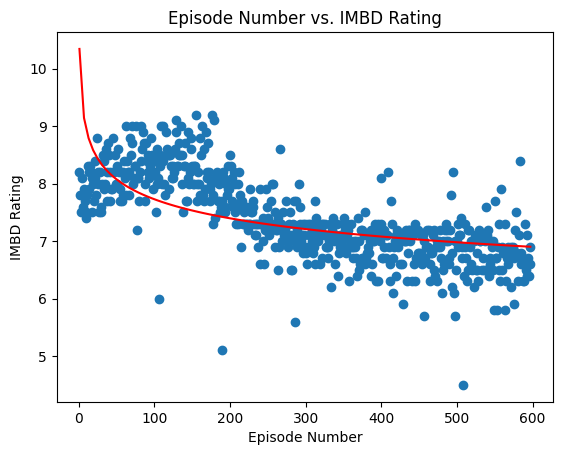

In [92]:
x_curve = np.linspace(min(linearArrayX), max(linearArrayX), 100)
y_curve = a0 * x_curve ** a1

plt.scatter(linearArrayX, linearArrayY)
plt.plot(x_curve, y_curve, color="red")

plt.title('Episode Number vs. IMBD Rating')
plt.xlabel('Episode Number')
plt.ylabel('IMBD Rating')

plt.show()

#Conclusion

We found that data can be messy, and a lot of data is seemingly independent of each other with seemingly little to no correlation. We found that for the linear regression, it was necessary to perform a linear regression, and it showed the decline in big hits selling records. Our nonlinear regression seemed to fit our prediction, but a linear regression could have sufficed. We would need to have a margin of error as we did for the linear regression and then compare the adequateness and scaled residuals to compare them properly.